# Breast Cancer Prediction

Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Import CSV file


In [2]:
dataset = pd.read_csv('c:/users/shekh/Desktop/Breast_Cancer_git/data.csv')

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


we do not need the 'id' and 'unnamed32' columns so its better to drop them

In [4]:
dataset.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [5]:
cols = dataset.columns
print(cols)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
dataset.shape

(569, 31)

we have successfully droppped the columns

lets check for missing values/NAN values

In [7]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Next we need to check for duplicates in dataset

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.shape

(569, 31)

Size of the dataset is same means no duplicates

#### lets plot the heatmap for correlation

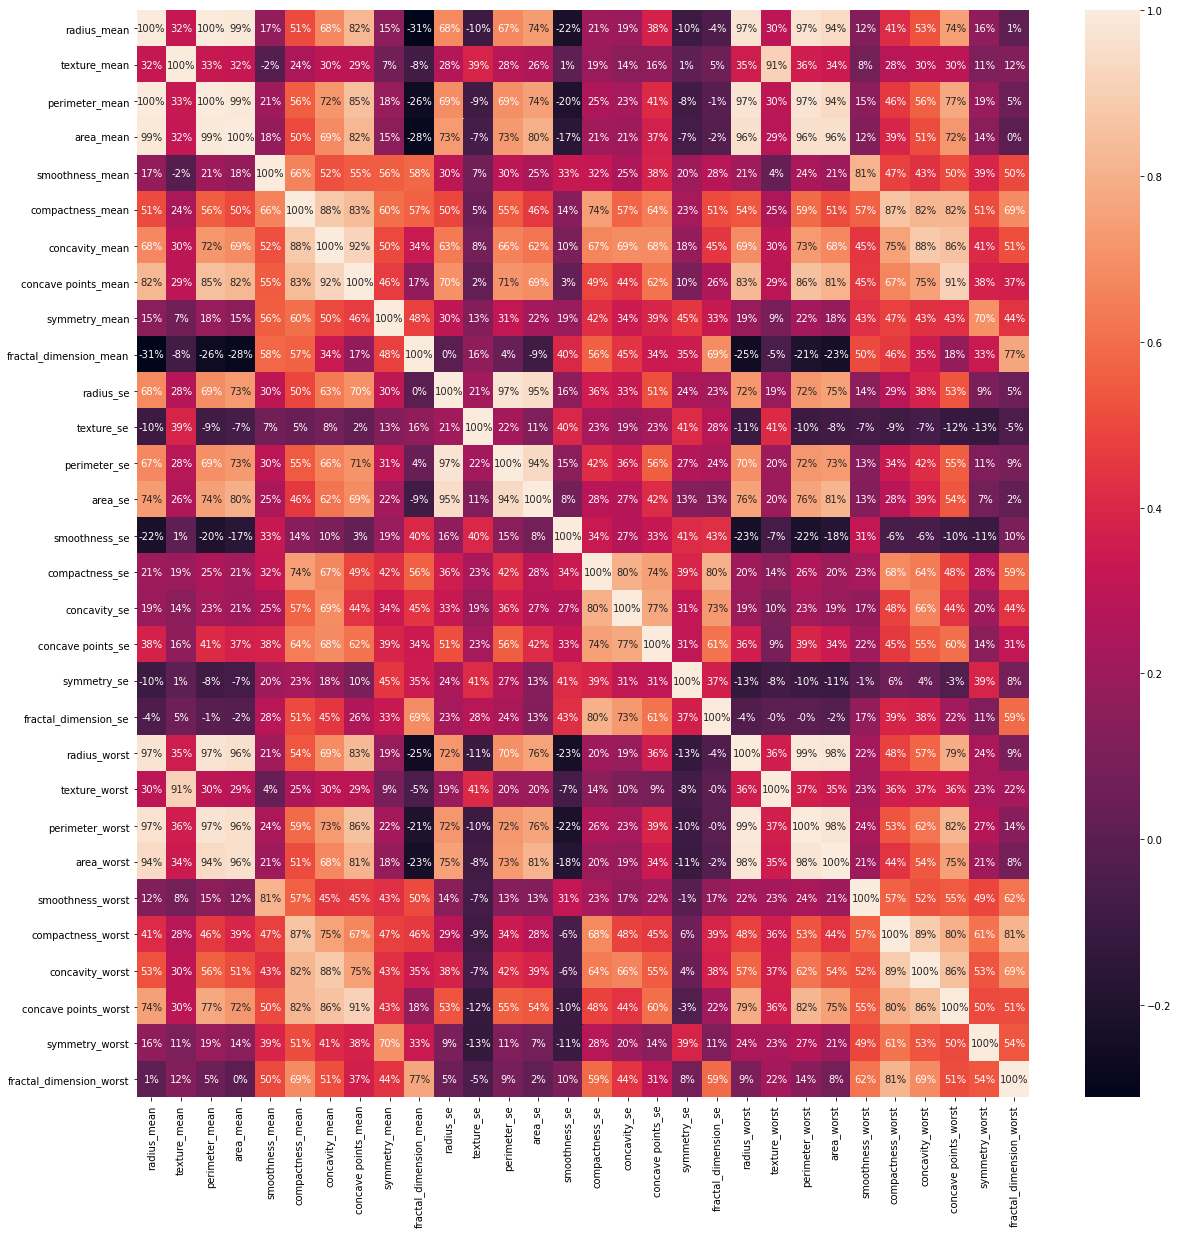

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True,fmt = '.0%');

#### Feature selection with correlation

* As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean.(basically anyone of the three)

* Similarly we can carryout same for the rest of the correlated features

* Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean, Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

* so lets drop the highly correlated columns from the dataset

In [11]:
drop_list = ['perimeter_mean','radius_mean','concavity_worst','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
data = dataset.drop(drop_list,axis = 1 )       
data.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


In [12]:
data.shape

(569, 16)

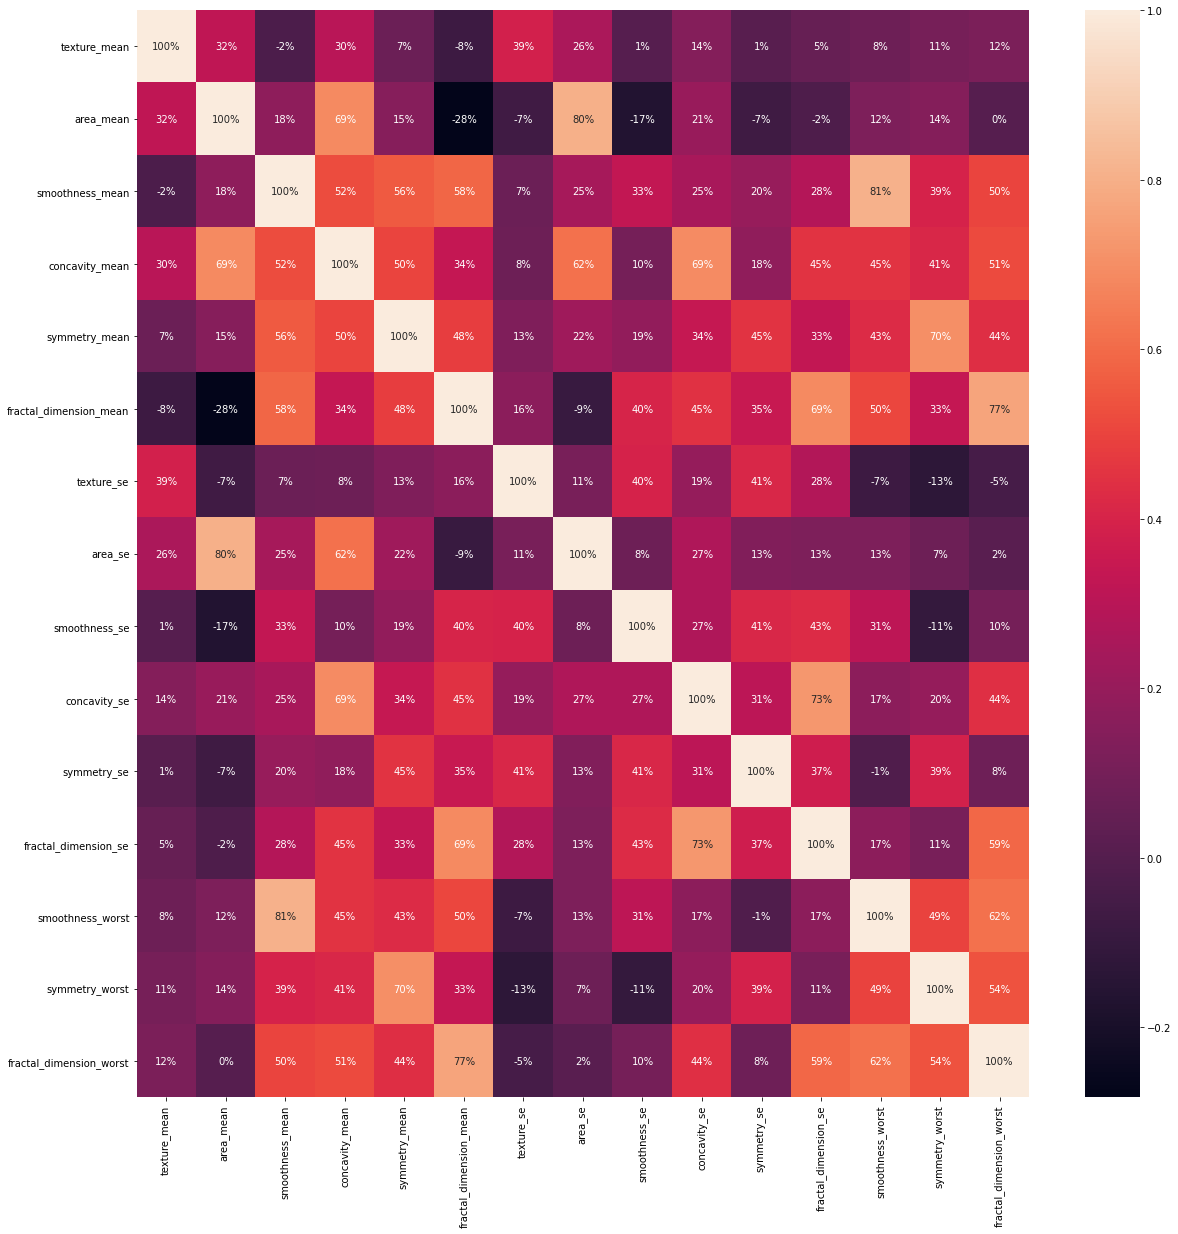

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True,fmt = '.0%');

Now we can see all there is no correlation of 0.9 or above among the left over variables i.e no independent variables are highly correlated

lets look into the target variable and onehot encode it

In [14]:
X = data.drop('diagnosis',axis=1)   #independent variable
y = data['diagnosis']               #dependent variable

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

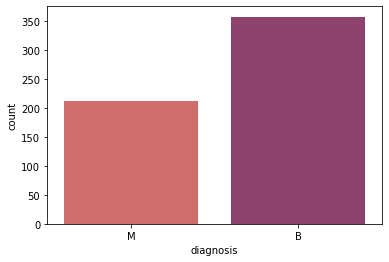

In [15]:
sns.countplot(y, palette='flare')

In [16]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [17]:
# lets one hot encode the dependent variable

In [18]:
y = y.map({'M':0,'B':1})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [19]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [20]:
type(y)

pandas.core.series.Series

### split dataset into train and test


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5,stratify=y)

In [22]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### SVC

In [24]:
from sklearn.svm import SVC
svc_classifier = SVC(C = 7,kernel = 'rbf')
model_sv = svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.8596491228070176

In [25]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[1][0])
    print('False negative = ', cm[0][1])
    print('True negative = ', cm[1][1])

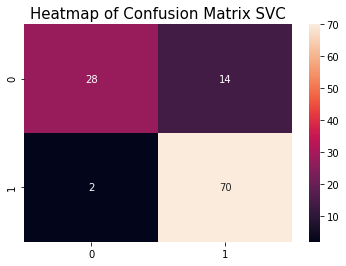

In [26]:
cm = confusion_matrix(y_test, y_pred_scv)
plt.title('Heatmap of Confusion Matrix SVC', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [27]:
print_confusion_matrix(y_test, y_pred_scv)

True positive =  28
False positive =  2
False negative =  14
True negative =  70


here we need to reduce FN as much as possible, because patient with cancer cannot be declared as having no cancer --->
0 - Malignant & 
1 - Benign

In [28]:
 from sklearn.metrics import fbeta_score,f1_score,recall_score,precision_score

In [29]:
fb_svc=fbeta_score(y_test, y_pred_scv, beta=2) #f2score since we need to select model with low f2score i.e we need to focus more on recall

In [30]:
fb_svc

0.9408602150537636

In [31]:
f1_score(y_test, y_pred_scv)

0.8974358974358975

In [32]:
recall_score(y_test,y_pred_scv)

0.9722222222222222

In [33]:
precision_score(y_test,y_pred_scv)

0.8333333333333334

### Logistic Regression

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51)
model_lr = lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.9385964912280702

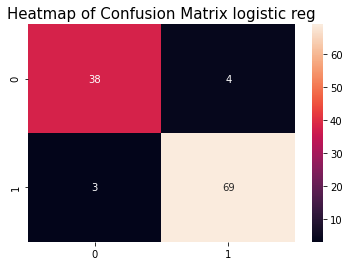

In [35]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.title('Heatmap of Confusion Matrix logistic reg', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [36]:
print_confusion_matrix(y_test, y_pred_lr)

True positive =  38
False positive =  3
False negative =  4
True negative =  69


In [37]:
fb_lr = fbeta_score(y_test, y_pred_lr, beta=2) #f2score since we need to select model with low f2score i.e we need to focus more on recall

In [38]:
fb_lr

0.9556786703601109

### Decision Tree

In [39]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 51)
model_dt = dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9298245614035088

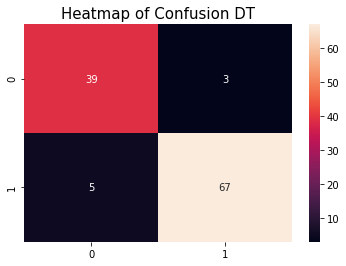

In [40]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.title('Heatmap of Confusion DT', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [41]:
print_confusion_matrix(y_test, y_pred_dt)

True positive =  39
False positive =  5
False negative =  3
True negative =  67


In [42]:
fb_dt = fbeta_score(y_test, y_pred_dt, beta=2) #f2score since we need to select model with low f2score i.e we need to focus more on recall

In [43]:
fb_dt

0.935754189944134

### Random Forest Classifier

In [44]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
model_rf = rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9649122807017544

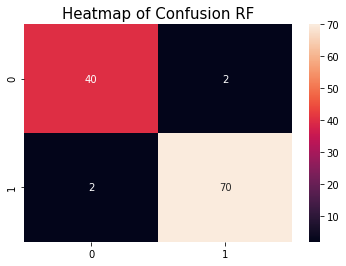

In [45]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [46]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[1][0])
    print('False negative = ', cm[0][1])
    print('True negative = ', cm[1][1])

In [47]:
print_confusion_matrix(y_test, y_pred_rf)

True positive =  40
False positive =  2
False negative =  2
True negative =  70


In [48]:
fb_rf = fbeta_score(y_test, y_pred_rf, beta=2) #f2score since we need to select model with low f2score i.e we need to focus more on recall

In [49]:
fb_rf

0.9722222222222222

### Shap Values

In [50]:
import shap

In [51]:
# Need to load JS vis in the notebook
shap.initjs()

In [52]:
shap_values = shap.TreeExplainer(rf_classifier).shap_values(X_train)

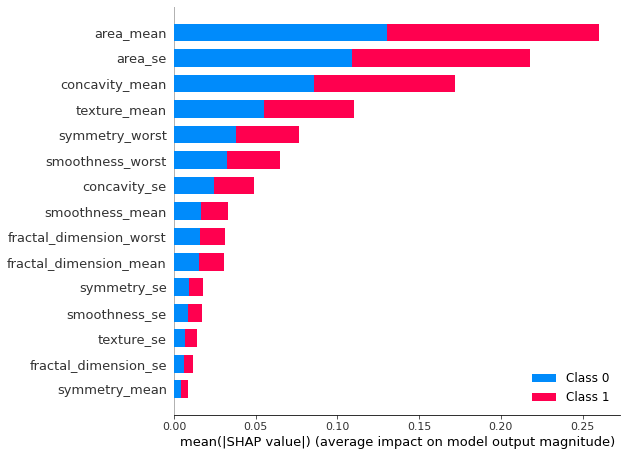

In [53]:
shap.summary_plot(shap_values, X_train)

### XGBoost Classifier

In [54]:
### XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

[01:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9912280701754386

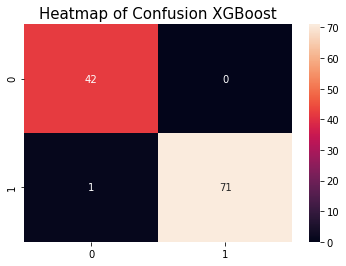

In [55]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.title('Heatmap of Confusion XGBoost', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [56]:
print_confusion_matrix(y_test, y_pred_xgb)

True positive =  42
False positive =  1
False negative =  0
True negative =  71


In [57]:
fb_xgb = fbeta_score(y_test, y_pred_xgb, beta=2) #f2score since we need to select model with low f2score i.e we need to focus more on recall

In [58]:
fb_xgb

0.988857938718663

#### Hyperparameter Tunning

In [59]:
# XGBoost classifier most required parameters
params={
 "learning_rate"    : [ 0.10, 0.30 ] ,
 "max_depth"        : [ 3, 4, 6],
 "min_child_weight" : [ 3, 5, 7 ],
 "gamma"            : [ 0.2, 0.3, 0.4 ],
 "alpha"            : [0.1,0.5,1,5],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ] 
}

In [60]:
# Randomized Search
from sklearn.model_selection import GridSearchCV
random_search = GridSearchCV(xgb_classifier, param_grid=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3,cv=5)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[01:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=10...
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                    

In [61]:
random_search.best_estimator_

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

alpha - L1 regularization term on weights. Increasing this value will make model more conservative.

In [62]:
xgb_classifier_pt = XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
model = xgb_classifier_pt.fit(X_train, y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(X_test)

[01:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
accuracy_score(y_test, y_pred_xgb_pt)

0.9912280701754386

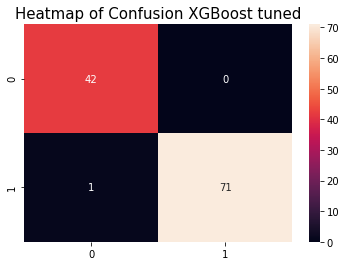

In [64]:
cm = confusion_matrix(y_test, y_pred_xgb_pt)
plt.title('Heatmap of Confusion XGBoost tuned', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [65]:
print_confusion_matrix(y_test, y_pred_xgb_pt)

True positive =  42
False positive =  1
False negative =  0
True negative =  71


In [66]:
fb_xgb_pt = fbeta_score(y_test, y_pred_xgb_pt, beta=2) #f2score since we need to select model with low f2score i.e we need to focus more on recall
fb_xgb_pt

0.988857938718663

### Using Shap values to explain complex model output and exffect of important variables on the output 

In [67]:
# Need to load JS vis in the notebook
shap.initjs()

In [68]:
shap_values = shap.TreeExplainer(xgb_classifier).shap_values(X_train)

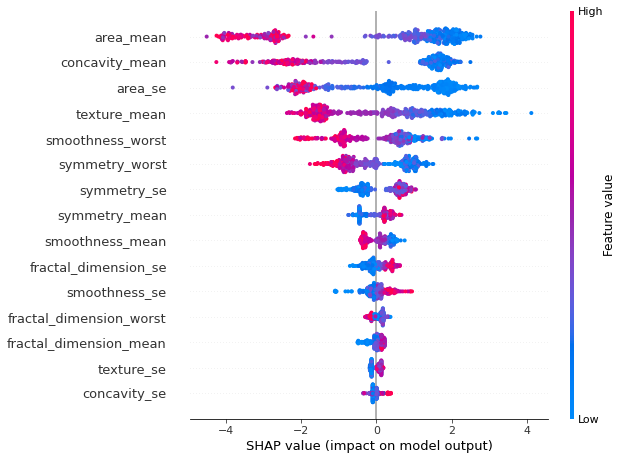

In [69]:
shap.summary_plot(shap_values, X_train)

#### So lets interpret the above plot

* The postive outcome is that breast tissue is benign that means no cancer and negative outcome is the tissue is malignant that high likelyhood of getting cancer.
* The above plot explains the variables which contributed most towwards the complex model output arranged in descending order.
* For eg. the 'area_mean' variable contributed most towards the model output, and the analysis can be explained as follows high-low is the value of the feature and -ve(i.e malignant tissue) to +ve(benign tissue) can be stated as "higher the value (red) of area_mean means it will contribute more towards negative outcome of model and the lower the value (blue) means it will contribute towards the positive outcome"   

### Final result with best model output with mteirc F2 score

In [70]:
list = [fb_svc,fb_dt,fb_lr,fb_rf,fb_xgb_pt,fb_xgb]


if (fb_svc == max(list)):
    print('The best F2 score is {:.7f} for SupportVector Machine model.'.format(fb_svc))
elif (fb_dt == max(list)):
    print('The best F2 score is {:.7f} for Decision Tree model.'.format(fb_dt))
elif (fb_lr == max(list)):
    print('The best F2 score is {:.7f} for Logistic Regreesion model.'.format(fb_lr))
elif (fb_rf == max(list)):
    print('The best F2 score is {:.7f} for Random Forest model.'.format(fb_rf))
elif (fb_xgb_pt == max(list)):
    print('The best F2 score is {:.7f} for for the fine tuned XGBoost model.'.format(fb_xgb_pt))

else:
    print('The best F2 score is {:.7f} for XGBoost model.'.format(fb_xgb))



The best F2 score is 0.9888579 for for the fine tuned XGBoost model.


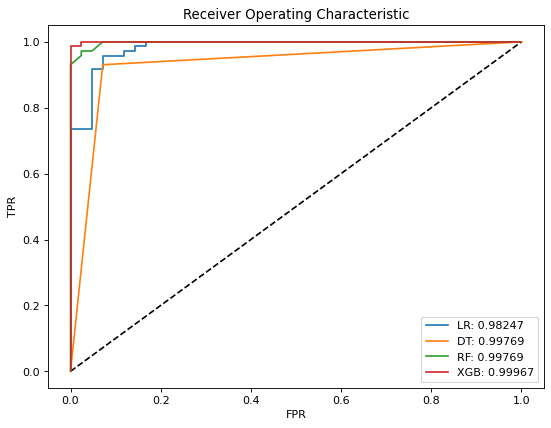

In [73]:
#ROC Curve
from matplotlib.pyplot import figure
import sklearn.metrics as metrics


figure(figsize=(8, 6), dpi=80)
from sklearn.metrics import roc_curve
y_pred_prob1 = lr_classifier.predict_proba(X_test)[:,1]

fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob1),5)

y_pred_prob2 = dt_classifier.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
auc2 = round(metrics.roc_auc_score(y_test, y_pred_prob2),5)

y_pred_prob3 = rf_classifier.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
auc3 = round(metrics.roc_auc_score(y_test, y_pred_prob3),5)
y_pred_prob4 = xgb_classifier.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
auc4 = round(metrics.roc_auc_score(y_test, y_pred_prob4),5)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LR: "+str(auc))
# plt.plot(fpr2, tpr2, label= "SVM")
plt.plot(fpr2, tpr2, label= "DT: "+str(auc3))
plt.plot(fpr3, tpr3, label= "RF: "+str(auc3))
plt.plot(fpr4, tpr4, label= "XGB: "+str(auc4))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()